<a href="https://colab.research.google.com/github/raj-vijay/ml/blob/master/04.Extreme%20Gradient%20Boost/06_Regularization_in_XGBoost_Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

In [ ]:
# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:squarederror","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2","rmse"]))

Best rmse as a function of l2:
    l2       rmse
0    1   6.022223
1   10   7.201520
2  100  10.692151


In [ ]:
import matplotlib.pyplot as plt

**Visualizing individual XGBoost trees**

Visually and explore the models. 

Individual trees are visualized from the fully boosted model that XGBoost creates using the entire housing dataset.

XGBoost has a plot_tree() function to visualize the models. 

After training a model using the XGBoost learning API, pass it to the plot_tree() function along with the number of trees to plot using the num_trees argument.

In [ ]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

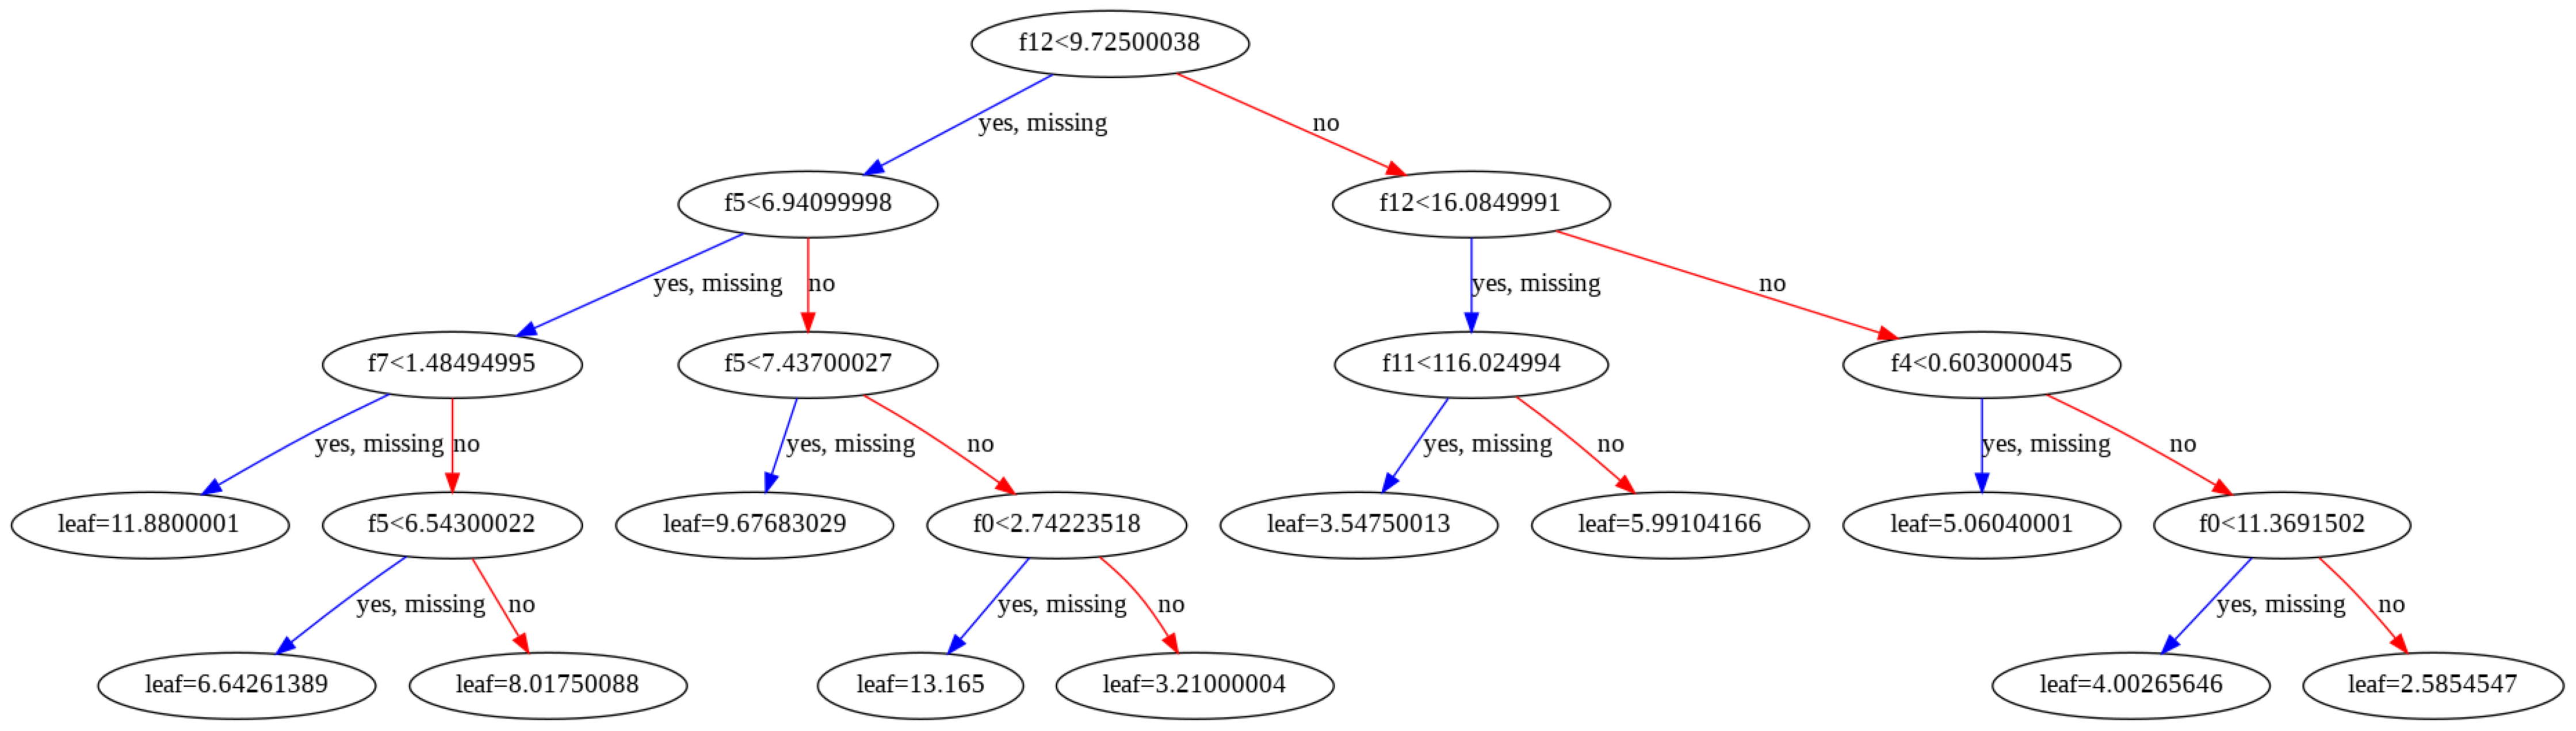

In [ ]:
# Plot the fifth tree
##set up the parameters
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50
xgb.plot_tree(xg_reg, num_trees=0)
plt.show()

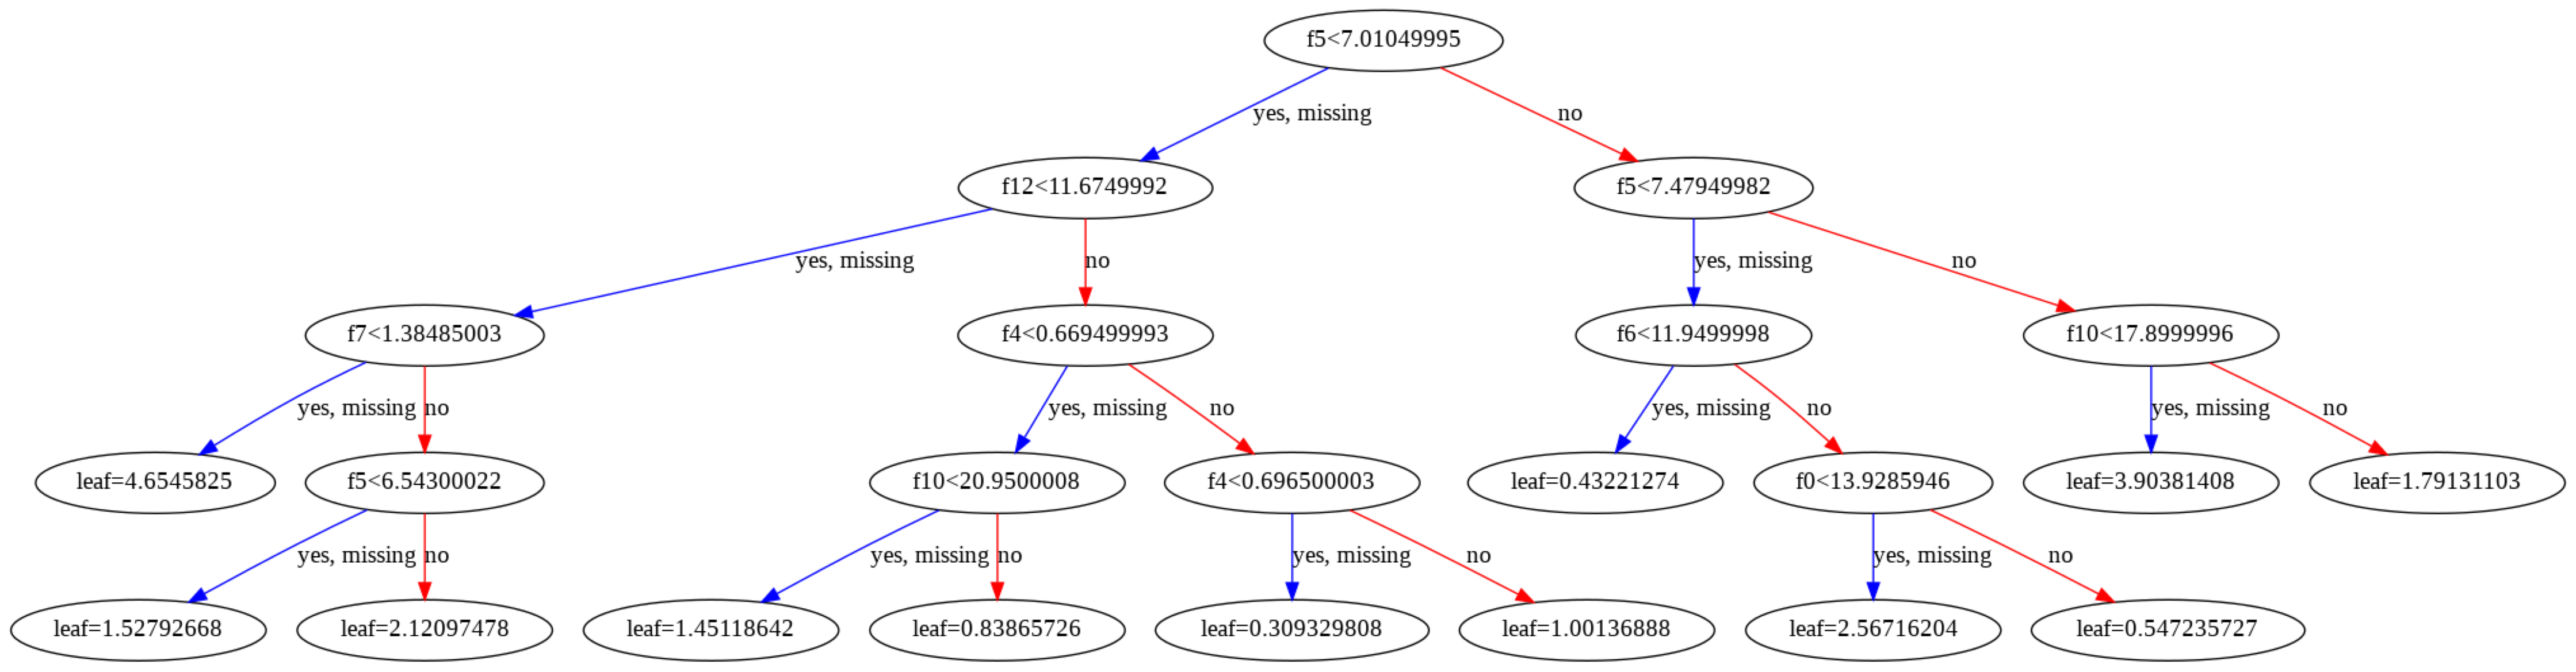

In [ ]:
# Plot the fifth tree
##set up the parameters
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50
xgb.plot_tree(xg_reg, num_trees=4)
plt.show()

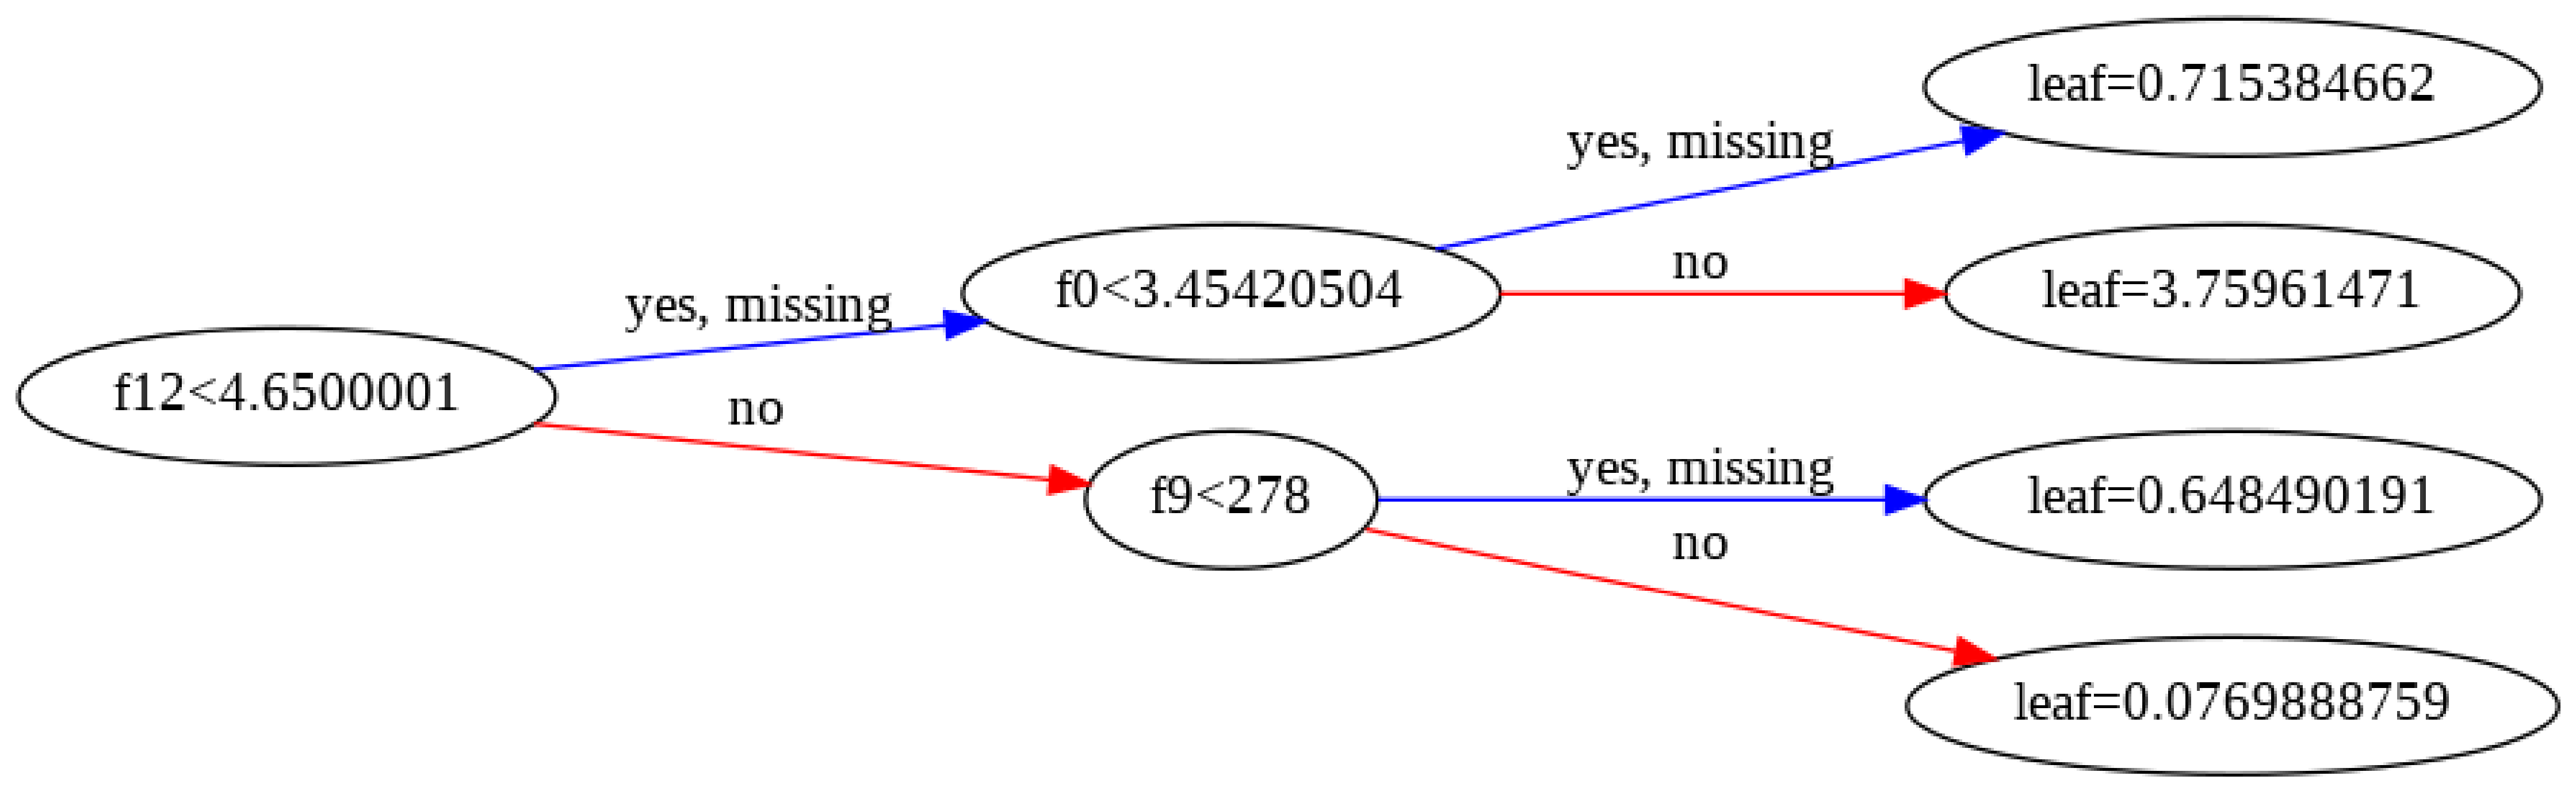

In [ ]:
# Plot the fifth tree
##set up the parameters
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50
xgb.plot_tree(xg_reg, num_trees=9, rankdir='LR')
plt.show()

**Visualizing feature importances** 

Determine the most important features of the dataset. Another way to visualize  XGBoost models is to examine the importance of each feature column in the original dataset within the model.

One simple way of doing this involves counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear. 

Use plot_importance() function from XGBoost.

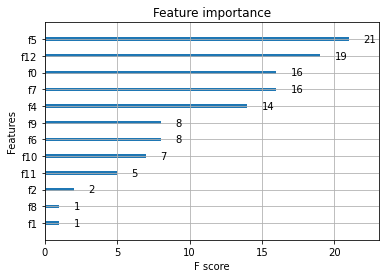

In [ ]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()